In [ ]:
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(r"/content/training_set.csv")

In [ ]:
df.drop("Unnamed: 0", axis =1 , inplace = True)
df.shape

(3910, 58)

In [ ]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.56,0.0,0.0,0.00,0.000,0.083,0.000,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.0,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.0,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.239,0.239,0.000,3.338,123,207,1
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,1.08,0.0,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.263,4,24,0
6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,0.29,0.14,0.58,0.00,0.00,0.00,0.00,0.00,0.14,2.35,0.14,1.02,0.0,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.29,0.0,0.00,0.00,0.0,0.00,0.0,0.14,0.0,0.0,0.00,0.000,0.204,0.000,0.153,0.153,0.102,2.705,73,368,1
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.000,0.000,2.284,19,329,0
8,0.00,0.00,0.19,0.00,0.19,0.19,0.00,0.00,0.00,0.19,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,1.54,0.00,0.96,0.0,0.00,0.00,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.0,0.19,0.57,0.38,0.38,0.00,0.0,0.19,0.38,0.0,0.38,0.0,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.000,0.000,2.894,45,411,0
9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,0.00,0.00,2.00,1.33,0.00,0.66,0.00,0.00,6.66,3.33,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.111,0.000,0.000,2.133,7,32,1


# Spliting Dataset

Splitting the training dataset and validation dataset in 4:1 ratio for performance evaluation. 

As the dataset is slightly imbalaced, stratified split is used to have same distribution of classes in train and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :57]
Y = df[["Y"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify = Y)


In [ ]:
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
1700,0.0,0.44,0.0,0.0,0.44,0.0,0.0,0.0,0.0,0.44,0.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.44,0.0,0.0,8.81,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4.367,0.000,0.0,0.074,0.0,0.592,7.288,43,328
3776,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,7.69,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.000,1,7
2345,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.49,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,2.23,0.74,0.00,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,1.49,0.0,1.49,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,4.000,45,140
2064,0.0,0.00,0.0,0.0,0.68,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.34,0.00,0.0,0.0,0.00,0.0,0.0,1.37,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,0.000,0.143,0.0,0.000,0.0,0.000,1.784,18,141
561,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.37,0.0,0.0,0.00,2.24,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.218,0.0,0.000,1.827,11,53


In [ ]:
y_train.head()

,Y
1700,0
3776,0
2345,0
2064,0
561,1


# Feature Selection

Here, in the given dataset independent variables are continuous and dependent variable is categorical. Hence we can use Anova F-score to determine the best features depending on the F score where higher F score denotes higher importance.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# f_classif calculate Anova f score for the feature

selector = SelectKBest(score_func= f_classif, k= 25) # To select to 25 features
selector.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=25)

In [ ]:
top_features = pd.Series(selector.scores_ , index = x_train.iloc[:, :57].columns).sort_values(ascending = False)

print(f"Average of F- Scores of the Features is {top_features.mean():.2f}") # Average F score
print(f"No. of Features with F scores more than average = {top_features[top_features >= top_features.mean()].count()}")


Average of F- Scores of the Features is 112.90
No. of Features with F scores more than average = 23


Text(0, 0.5, 'F- Scores')

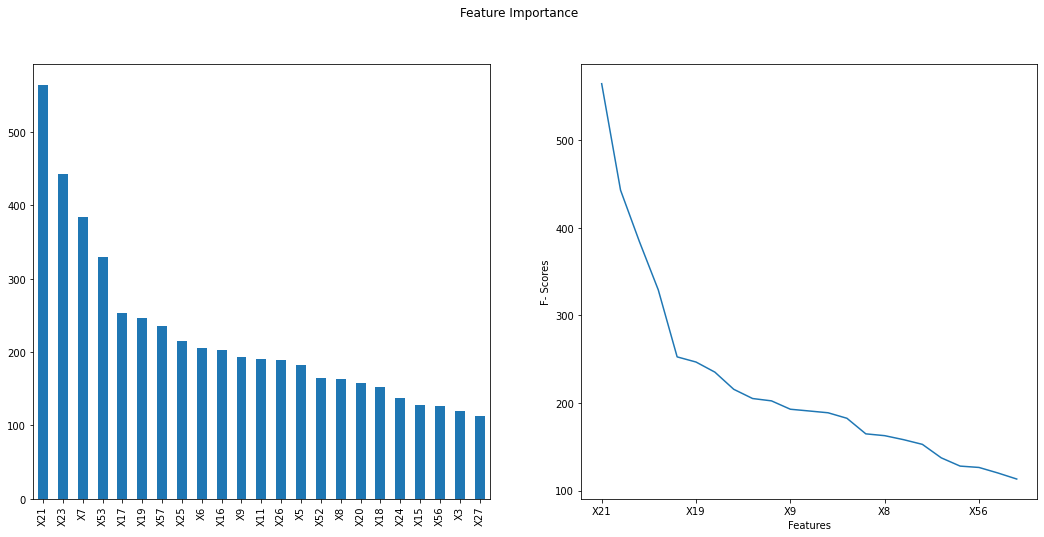

In [ ]:
# plotting the F scores to identify the important Features

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
top_features[top_features >= top_features.mean()].plot.bar(ax = axs[0])
top_features[top_features >= top_features.mean()].plot(ax = axs[1])
fig.suptitle('Feature Importance')
plt.xlabel('Features')
plt.ylabel('F- Scores')

So the top 25 important columns are selected for model building.

In [ ]:
top_cols = selector.get_support(indices = True)
top_cols

array([ 2,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24,
       25, 26, 29, 36, 51, 52, 55, 56])

Only those important columns are selected in x_train and x_test and the remaining features are removed

In [ ]:
x_train = x_train.iloc[:, top_cols]
x_test = x_test.iloc[:, top_cols]

In [ ]:
x_train.head()

,X3,X5,X6,X7,X8,X9,X11,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X30,X37,X52,X53,X56,X57
1700,0.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.074,0.0,43,328
3776,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,7.69,0.00,0.00,0.000,0.0,1,7
2345,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,2.23,0.74,0.00,0.74,1.49,0.000,0.0,45,140
2064,0.0,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.34,0.00,0.00,0.00,0.000,0.0,18,141
561,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.37,0.0,0.0,2.24,0.0,0.00,0.00,0.00,0.00,0.00,0.218,0.0,11,53


In [ ]:
x_test.head()

,X3,X5,X6,X7,X8,X9,X11,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X30,X37,X52,X53,X56,X57
1382,0.00,0.00,0.00,0.0,2.53,0.0,0.00,0.00,0.0,1.26,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.186,0.186,23,84
1997,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.070,0.000,43,356
3581,0.00,0.68,0.00,0.0,0.00,0.0,0.00,0.68,0.0,0.00,0.0,0.68,0.00,0.00,0.00,0.00,2.72,2.72,2.04,0.68,0.68,0.000,0.000,12,123
3576,0.24,1.63,0.49,0.0,0.00,0.0,0.08,0.00,0.0,0.32,0.0,3.68,0.32,0.65,1.14,0.08,0.00,0.00,0.00,0.00,0.00,0.000,0.232,10,333
674,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.684,0.000,7,16


Plotting Correlogram between best features selected.

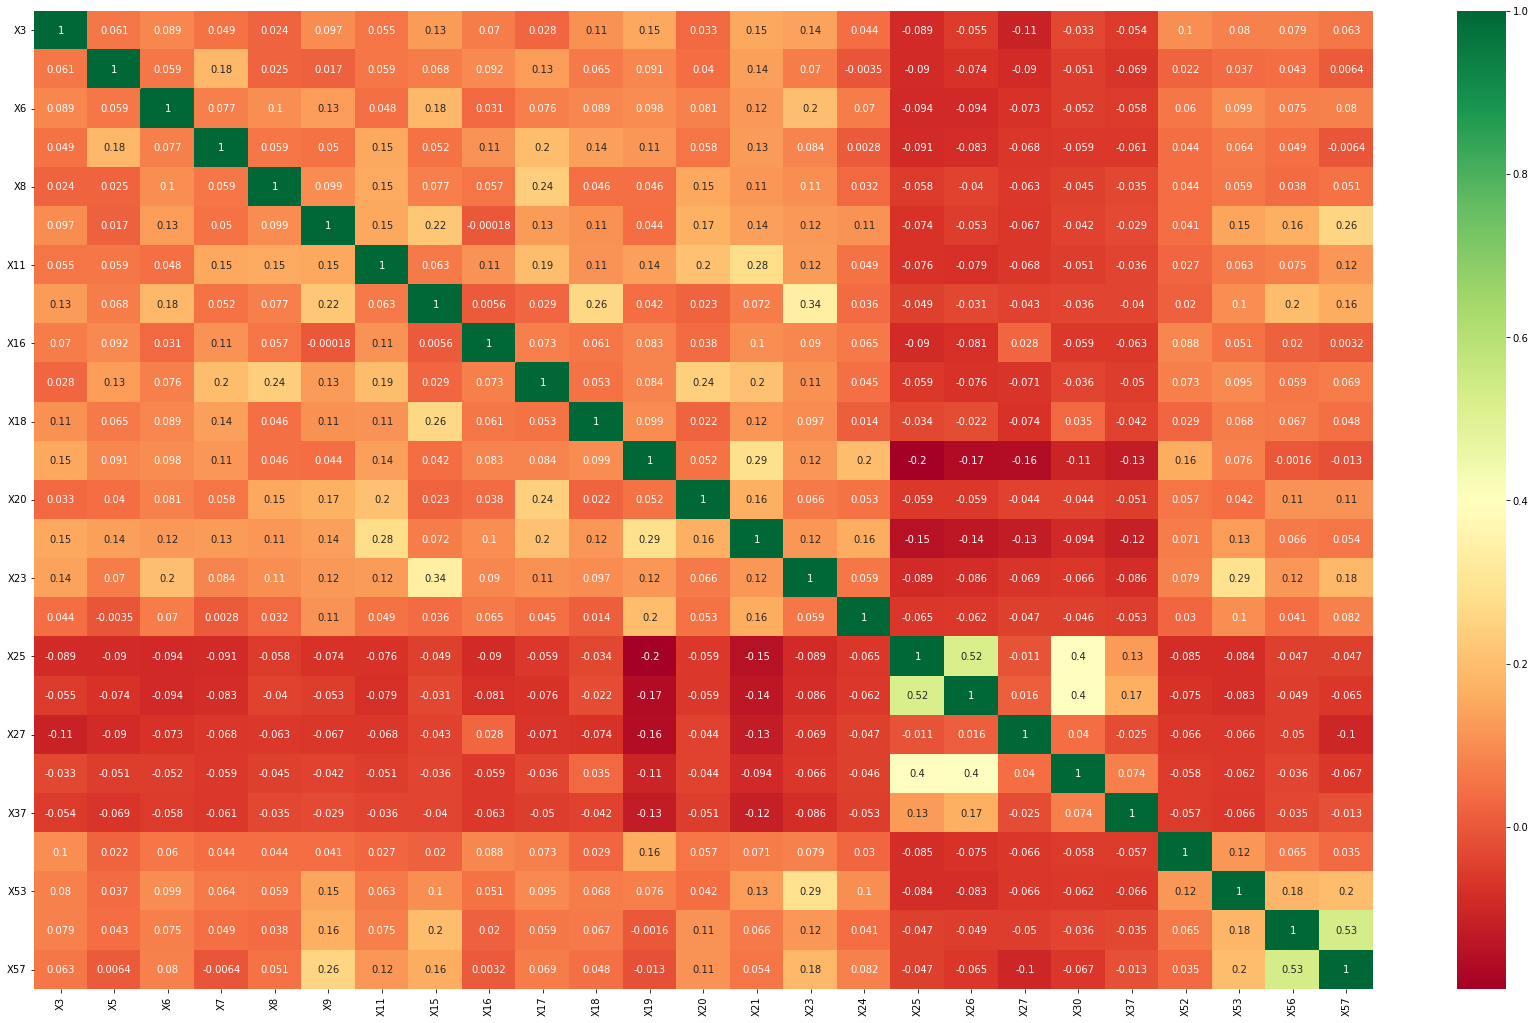

In [84]:
#Correlogram
sns.heatmap(x_train.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(30,18)
plt.show()

Thus the variable does not have any multi coliinearity problem.

# Data Preprocesing 


As different variables are of different scale, The entire features has to be bought under same scale before giving it to the model. As the dataset is highly skewed Minmax scaler is used for feature scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()

# fit_transform training data
x_train_norm = normalize.fit_transform(x_train)
x_test_norm = normalize.fit_transform(x_test)

# Model Building & Evaluation metrics


The Following Models are being considered to evaluate the performance:\

* Naive Bayes
* KNN
* Decision Tree Classifier
* Random Forest Classifier
* Logistic Regression
* Extreme Gradient Boost
* Artificial Neural Network(ANN)


**Evaluation Metrics**\
As this is a binary clasification problem we can use Binary cross entropy/log loss along with ROC-AUC score and Accuracy.\
For visualizattion of the result Confusion matrix can be used.


# Naive Bayes Model
Since it is a sparse data, Multinomial Naive Bayes is used.

In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix,log_loss, classification_report
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")



Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.97      0.86      0.91       537
     class 1       0.76      0.95      0.84       245

    accuracy                           0.89       782
   macro avg       0.86      0.90      0.88       782
weighted avg       0.90      0.89      0.89       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.98      0.78      0.87      2383
     class 1       0.58      0.95      0.72       745

    accuracy                           0.82      3128
   macro avg       0.78      0.87      0.79      3128
weighted avg       0.88      0.82      0.83      3128

ROC-AUC for validation dataset = 0.9642722441282359
ROC-AUC for Train dataset = 0.950195217461577


Log loss for validation dataset = 0.44451502195380926
Log loss for Train dataset = 0.4760143455289346 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for validation dataset 
 


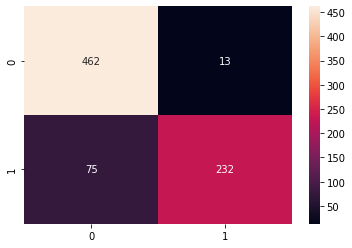

In [ ]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')


Confusion Matrix for train dataset 
 


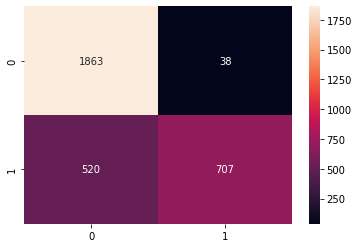

In [ ]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")

#KNN 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

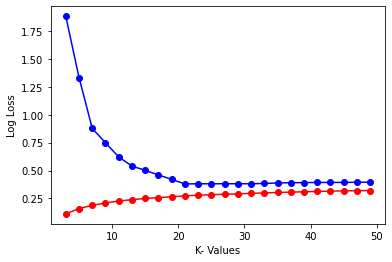

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and storing the log loss values to identify optimum k value for K neighbour
loss = []

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train_norm, y_train)
    train_loss = log_loss(y_train, neigh.predict_proba(x_train_norm)[:, 1])
    test_loss = log_loss(y_test, neigh.predict_proba(x_test_norm)[:, 1])
    loss.append([train_loss, test_loss])

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in loss],"ro-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in loss],"bo-")
plt.xlabel('K- Values')
plt.ylabel('Log Loss')
plt.show()

From the Plot made we can see that dropp in Loss is minimum after k value 11. Hence we can conclude that the optimal k value is 13

In [ ]:
model = KNeighborsClassifier(n_neighbors= 11)
model.fit(x_train, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names,

Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       1.00      0.61      0.76       782
     class 1       0.00      0.00      0.00         0

    accuracy                           0.61       782
   macro avg       0.50      0.30      0.38       782
weighted avg       1.00      0.61      0.76       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       1.00      0.61      0.76      3128
     class 1       0.00      0.00      0.00         0

    accuracy                           0.61      3128
   macro avg       0.50      0.30      0.38      3128
weighted avg       1.00      0.61      0.76      3128

ROC-AUC for validation dataset = 0.5
ROC-AUC for Train dataset = 0.5


Log loss for validation dataset = 13.559340605163145
Log loss for Train dataset = 13.548298796852752 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

# Decision Tree
Decision Tree Classifier is used with cross validation and Grid search so as return the best parameters and proceed with them.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param = {"criterion": ["gini"], "max_depth" : [5, 8, 10, 12], 
         "min_impurity_decrease" : [0.05, 0.07, 0.1, 0.13], "min_samples_split" : [5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param, cv = 10, scoring='roc_auc')

grid_search.fit(x_train_norm, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 8, 10, 12],
                         'min_impurity_decrease': [0.05, 0.07, 0.1, 0.13],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='roc_auc')

In [79]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.05, 'min_samples_split': 5}


In [80]:
model = DecisionTreeClassifier (criterion = 'gini', max_depth = 5, min_impurity_decrease = 0.05, min_samples_split = 5)
model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")

Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.91      0.85      0.88       504
     class 1       0.76      0.84      0.80       278

    accuracy                           0.85       782
   macro avg       0.83      0.85      0.84       782
weighted avg       0.85      0.85      0.85       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.94      0.84      0.89      2132
     class 1       0.72      0.89      0.80       996

    accuracy                           0.85      3128
   macro avg       0.83      0.86      0.84      3128
weighted avg       0.87      0.85      0.86      3128

ROC-AUC for validation dataset = 0.8365300874335676
ROC-AUC for Train dataset = 0.8316403197047666


Log loss for validation dataset = 0.42903310288250085
Log loss for Train dataset = 0.41246451893809 



Confusion Matrix for validation dataset 
 


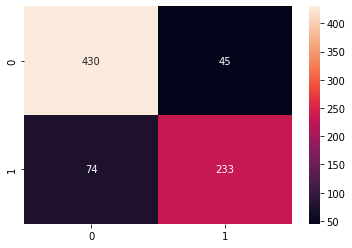

In [82]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')

Confusion Matrix for train dataset 
 


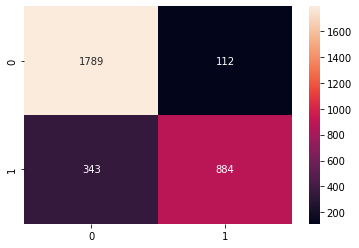

In [83]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param = {"criterion": ["gini"], "n_estimators" : [200, 300, 400, 500, 600],"max_depth" : [5, 8, 10], 
         "min_impurity_decrease" : [0.05, 0.07, 0.1], "min_samples_split" : [5, 10, 15]}

grid_search = GridSearchCV(RandomForestClassifier(), param, cv = 10, scoring='roc_auc')

grid_search.fit(x_train_norm, y_train)

In [101]:
print(grid_search.best_params_)

{'eta': 0.01, 'gamma': 10, 'learning_rate': 0.01}


In [86]:
model = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_impurity_decrease = 0.05, min_samples_split = 15, n_estimators = 500)
model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.96      0.88      0.92       522
     class 1       0.79      0.93      0.85       260

    accuracy                           0.89       782
   macro avg       0.88      0.90      0.89       782
weighted avg       0.90      0.89      0.90       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.98      0.86      0.91      2170
     class 1       0.74      0.95      0.84       958

    accuracy                           0.89      3128
   macro avg       0.86      0.90      0.87      3128
weighted avg       0.91      0.89      0.89      3128

ROC-AUC for validation dataset = 0.9518189610834905
ROC-AUC for Train dataset = 0.9531467374225464


Log loss for validation dataset = 0.39938423784925553
Log loss for Train dataset = 0.3974529716725382 



Confusion Matrix for validation dataset 
 


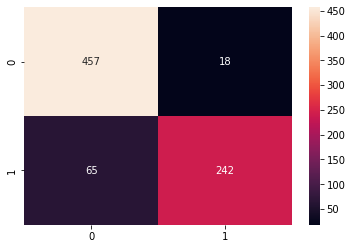

In [87]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')

Confusion Matrix for train dataset 
 


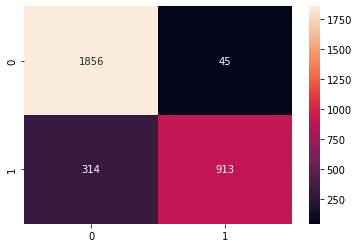

In [88]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")

# Penalised Logisic Regression
As the important feaures are already selected, L2 regularisation is used too preserve all the features.

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l2', max_iter = 200, n_jobs = -1)

model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.88      0.94      0.91       443
     class 1       0.91      0.83      0.87       339

    accuracy                           0.89       782
   macro avg       0.89      0.88      0.89       782
weighted avg       0.89      0.89      0.89       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.95      0.86      0.90      2111
     class 1       0.75      0.91      0.82      1017

    accuracy                           0.87      3128
   macro avg       0.85      0.88      0.86      3128
weighted avg       0.89      0.87      0.88      3128

ROC-AUC for validation dataset = 0.9513800788616491
ROC-AUC for Train dataset = 0.9401451730247925


Log loss for validation dataset = 0.3243852823064999
Log loss for Train dataset = 0.3427624795650661 



Confusion Matrix for validation dataset 
 


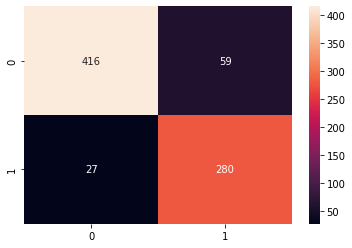

In [90]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')

Confusion Matrix for train dataset 
 


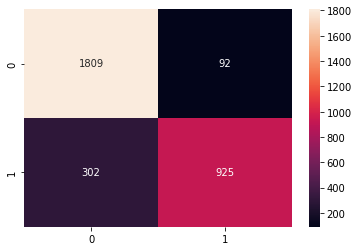

In [91]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")

# Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(min_impurity_decrease = 0.05, min_samples_split = 15, n_estimators = 500)

param = {'learning_rate': [0.1, 0.01, 0.05], 'eta' : [0.01, 0.05, 0.1], 'gamma': [10, 15, 20]}

grid_search = GridSearchCV(xgb, param, cv = 10, scoring='roc_auc')

grid_search.fit(x_train_norm, y_train)


In [102]:
print(grid_search.best_params_)

{'eta': 0.01, 'gamma': 10, 'learning_rate': 0.01}


In [95]:
model = XGBClassifier(min_impurity_decrease = 0.05, min_samples_split = 15, n_estimators = 500, n_jobs = -1, eta = 0.01, gamma = 10, learning_rate = 0.01)

model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.88      0.95      0.91       440
     class 1       0.93      0.83      0.88       342

    accuracy                           0.90       782
   macro avg       0.90      0.89      0.90       782
weighted avg       0.90      0.90      0.90       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.97      0.93      0.95      1968
     class 1       0.90      0.95      0.92      1160

    accuracy                           0.94      3128
   macro avg       0.93      0.94      0.94      3128
weighted avg       0.94      0.94      0.94      3128

ROC-AUC for validation dataset = 0.9728853077318704
ROC-AUC for Train dataset = 0.9825193877712883


Log loss for validation dataset = 0.23615195943028344
Log loss for Train dataset = 0.17812018114728068 



Confusion Matrix for validation dataset 
 


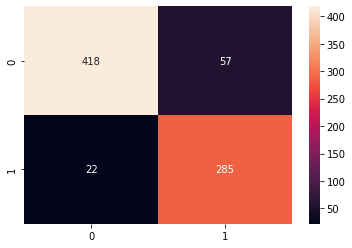

In [96]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')

Confusion Matrix for train dataset 
 


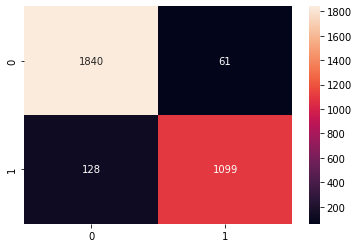

In [97]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")

In [98]:
from sklearn.ensemble import VotingClassifier

learner_1 = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_impurity_decrease = 0.05, min_samples_split = 15, n_estimators = 500)
learner_2 = LogisticRegression(penalty = 'l2', max_iter = 200, n_jobs = -1)
learner_3 = XGBClassifier(min_impurity_decrease = 0.05, min_samples_split = 15, n_estimators = 500, n_jobs = -1, eta = 0.01, gamma = 10, learning_rate = 0.01)

model = VotingClassifier([('Random_Forest', learner_1),
                           ('Logistic_Regression', learner_2),
                           ('XG_Boost', learner_3)],
                            voting = 'soft')

model.fit(x_train_norm, y_train)

test_pred = model.predict(x_test_norm)
test_proba = model.predict_proba(x_test_norm)[:, 1]

train_pred = model.predict(x_train_norm)
train_proba = model.predict_proba(x_train_norm)[:, 1]

target_names = ['class 0', 'class 1']
print("Classification Report for Validation dataset \n\n" + classification_report(test_pred, y_test, target_names=target_names))
print("Classification Report for Train dataset \n\n" + classification_report(train_pred, y_train, target_names=target_names))

print(f"ROC-AUC for validation dataset = {roc_auc_score(y_test, test_proba)}")
print(f"ROC-AUC for Train dataset = {roc_auc_score(y_train, train_proba)}")

print(f"\n\nLog loss for validation dataset = {log_loss(y_test, test_proba)}")
print(f"Log loss for Train dataset = {log_loss(y_train, train_proba)} \n")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for Validation dataset 

              precision    recall  f1-score   support

     class 0       0.94      0.95      0.95       470
     class 1       0.93      0.91      0.92       312

    accuracy                           0.94       782
   macro avg       0.94      0.93      0.93       782
weighted avg       0.94      0.94      0.94       782

Classification Report for Train dataset 

              precision    recall  f1-score   support

     class 0       0.98      0.91      0.95      2035
     class 1       0.86      0.96      0.91      1093

    accuracy                           0.93      3128
   macro avg       0.92      0.94      0.93      3128
weighted avg       0.94      0.93      0.93      3128

ROC-AUC for validation dataset = 0.9735984913423624
ROC-AUC for Train dataset = 0.9763908413493176


Log loss for validation dataset = 0.2929959137927303
Log loss for Train dataset = 0.286950298950957 



Confusion Matrix for validation dataset 
 


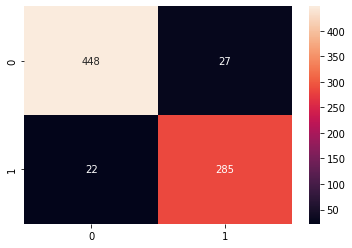

In [99]:
print("Confusion Matrix for validation dataset \n ")
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = 'g')

Confusion Matrix for train dataset 
 


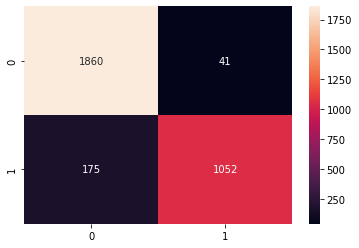

In [100]:
print("Confusion Matrix for train dataset \n ")
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = "g")